<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.659274  58.170081  99.606676  ...  260.436234  260.436069  0.000165
      1.0    83.061564  67.406097  60.405285  ...  220.872845  220.872946 -0.000101
      2.0    95.968108  91.707345  91.419509  ...  289.094981  289.094965  0.000016
      3.0    61.084088  28.075604  48.603887  ...  147.764211  147.763619  0.000592
      4.0    86.826714  51.197526  87.140323  ...  235.164578  235.164599 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  53.730128  65.483145  29.848571  ...  159.061903  159.061933 -0.000030
      246.0  88.172912  24.982171  72.150710  ...  195.304957  195.305547 -0.000590
      247.0  76.438261  52.456337  83.019213  ...  221.914293  221.913609  0.000683
      248.0  27.683174  27.730676  45.578465  ...  110.992622  110.992268  0.000353
      249.0  24.539447  22.988745  84.031401  ...  141.557793  141.559375 -0.001582

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.659274  58.170081  99.606676  ...  260.436234  260.436069  0.000165
      1.0    83.061564  67.406097  60.405285  ...  220.872845  220.872946 -0.000101
      2.0    95.968108  91.707345  91.419509  ...  289.094981  289.094965  0.000016
      3.0    61.084088  28.075604  48.603887  ...  147.764211  147.763619  0.000592
      4.0    86.826714  51.197526  87.140323  ...  235.164578  235.164599 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  53.730128  65.483145  29.848571  ...  159.061903  159.061933 -0.000030
      246.0  88.172912  24.982171  72.150710  ...  195.304957  195.305547 -0.000590
      247.0  76.438261  52.456337  83.019213  ...  221.914293  221.913609  0.000683
      248.0  27.683174  27.730676  45.578465  ...  110.992622  110.992268  0.000353
      249.0  24.539447  22.988745  84.031401  ...  141.557793  141.559375 -0.001582

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.659274  58.170081  99.606676  ...  260.436234  260.436069  0.000165
      1.0    83.061564  67.406097  60.405285  ...  220.872845  220.872946 -0.000101
      2.0    95.968108  91.707345  91.419509  ...  289.094981  289.094965  0.000016
      3.0    61.084088  28.075604  48.603887  ...  147.764211  147.763619  0.000592
      4.0    86.826714  51.197526  87.140323  ...  235.164578  235.164599 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  53.730128  65.483145  29.848571  ...  159.061903  159.061933 -0.000030
      246.0  88.172912  24.982171  72.150710  ...  195.304957  195.305547 -0.000590
      247.0  76.438261  52.456337  83.019213  ...  221.914293  221.913609  0.000683
      248.0  27.683174  27.730676  45.578465  ...  110.992622  110.992268  0.000353
      249.0  24.539447  22.988745  84.031401  ...  141.557793  141.559375 -0.001582

[250000 rows x 7 columns]

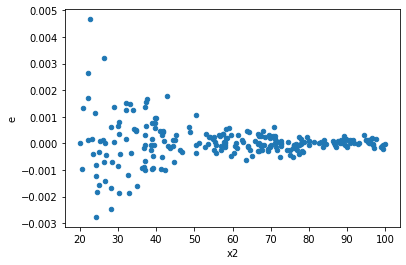

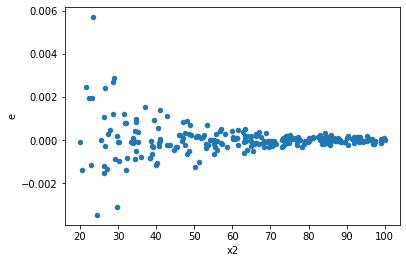

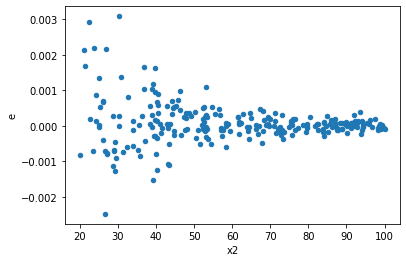

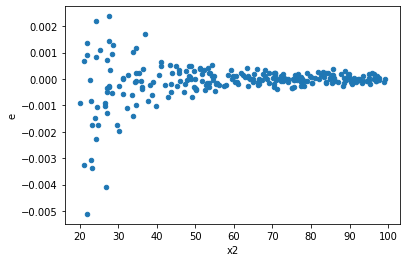

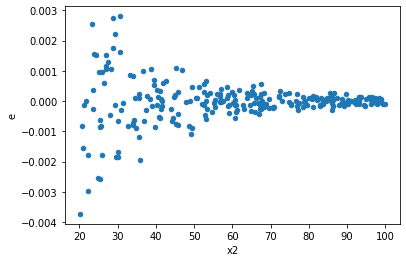

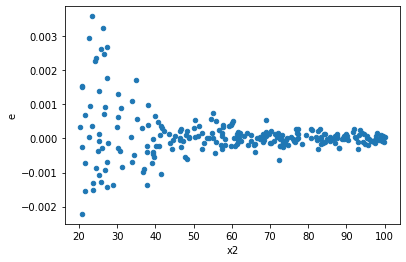

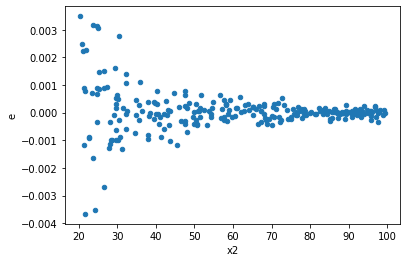

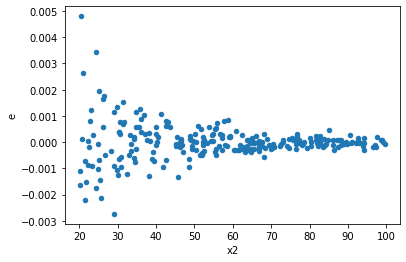

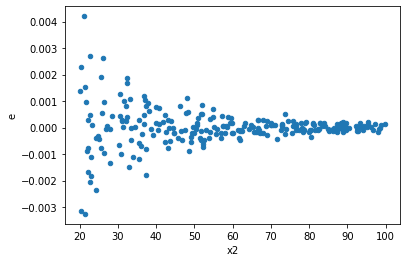

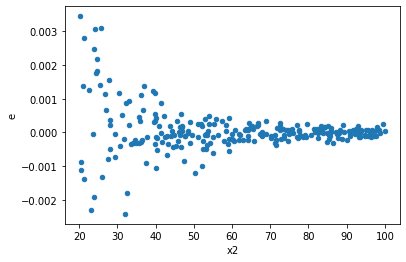

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.000122007211262338,3.114629027041728e-06,1.2578063016735876e-06,3.210957759836833e-08,0.025528237182183448,6.421596494989146e-51,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.00012748028507439448,1.6319027057949148e-06,1.3142297430349946e-06,1.6823739234999122e-08,0.012801216320175116,6.082331400116377e-65,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,7.7880391681429e-05,1.9791570994108444e-06,8.028906358910206e-07,2.04036814372252e-08,0.02541277793653913,5.209628773306874e-51,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.00012352283696647338,2.1161639872953228e-06,1.2734313089327152e-06,2.1816123580364153e-08,0.01713176315623072,5.568339671430288e-59,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.00012822478254731172,2.2417980199620854e-06,1.3219049747145539e-06,2.311131979342356e-08,0.01748334429138079,1.4432927047437955e-58,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.0001096509435736528,2.2267805384491637e-06,1.1304220986974515e-06,2.295650039638313e-08,0.020307901290000572,1.5828472531881902e-55,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.00013342660924297998,2.4284486768812754e-06,1.37553205405134e-06,2.5035553369910054e-08,0.018200632472484452,9.488171044827261e-58,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.0001156598690139843,2.625446924668378e-06,1.1923697836493227e-06,2.7066463140911112e-08,0.022699722445223745,2.8059224670251845e-53,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.0001209859566804253,2.177588814085244e-06,1.2472779039219103e-06,2.244936921737365e-08,0.017998690706204606,5.628034671162818e-58,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64